In [1]:
# explore extra trees number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # explore number of features from 1 to 20
    for i in range(1, 21):
        models[str(i)] = ExtraTreesClassifier(max_features=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.896 (0.029)
>2 0.904 (0.028)
>3 0.910 (0.028)
>4 0.915 (0.023)
>5 0.913 (0.025)
>6 0.907 (0.024)
>7 0.908 (0.025)
>8 0.906 (0.028)
>9 0.907 (0.023)
>10 0.907 (0.027)
>11 0.912 (0.027)
>12 0.908 (0.029)
>13 0.909 (0.022)
>14 0.910 (0.024)
>15 0.910 (0.023)
>16 0.908 (0.024)
>17 0.910 (0.025)
>18 0.907 (0.024)
>19 0.903 (0.024)
>20 0.907 (0.027)


<Figure size 640x480 with 1 Axes>

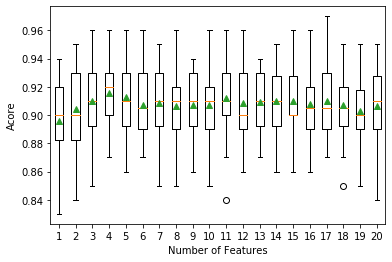

In [4]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xlabel("Number of Features")
pyplot.ylabel("Acore")
pyplot.show()

# We see a trend in performance rising and peaking with values between four and nine and falling or staying flat as larger 
# feature set sizes are considered.